<a href="https://colab.research.google.com/github/catpixie-47/FDIP/blob/main/FDIP_6_123B1F047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

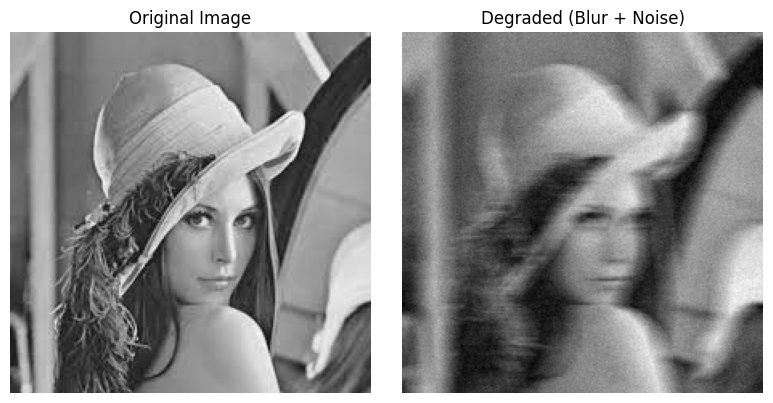

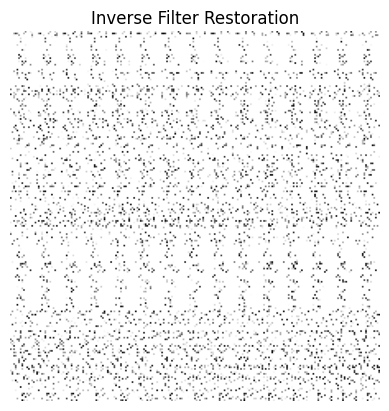

/tmp/ipython-input-2671176211.py:54: RuntimeWarning: divide by zero encountered in divide
  restored = np.fft.ifft2(wiener_factor * (F / H_fft))
/tmp/ipython-input-2671176211.py:54: RuntimeWarning: invalid value encountered in multiply
  restored = np.fft.ifft2(wiener_factor * (F / H_fft))


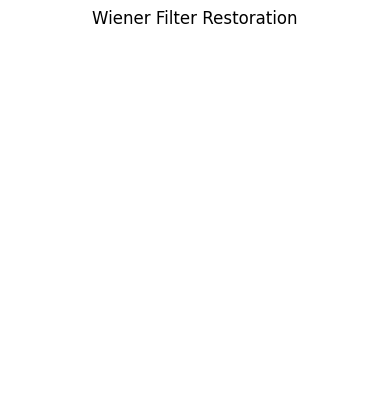

inverse filter fails due to noise amplification and instability.
wiener filter gives better restoration by controlling noise influence.


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("test.jpg", cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Image not found! Please check the path.")
else:

    img = img / 255.0
    def motion_blur_kernel(size=15):
        kernel = np.zeros((size, size))
        kernel[int((size - 1)/2), :] = np.ones(size)
        kernel = kernel / size
        return kernel

    H = motion_blur_kernel()


    degraded = cv2.filter2D(img, -1, H)

    noise = np.random.normal(0, 0.02, img.shape)
    degraded_noisy = degraded + noise
    degraded_noisy = np.clip(degraded_noisy, 0, 1)

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Original Image"), plt.axis('off')
    plt.subplot(1,2,2), plt.imshow(degraded_noisy, cmap='gray'), plt.title("Degraded (Blur + Noise)"), plt.axis('off')
    plt.tight_layout()
    plt.show()

    def inverse_filter(degraded, H):
        F = np.fft.fft2(degraded)
        H_fft = np.fft.fft2(H, s=degraded.shape)
        H_fft[np.abs(H_fft) < 1e-3] = 1e-3
        restored = np.fft.ifft2(F / H_fft)
        restored = np.abs(restored)
        return np.clip(restored, 0, 1)

    inv_restored = inverse_filter(degraded_noisy, H)

    plt.imshow(inv_restored, cmap='gray')
    plt.title("Inverse Filter Restoration")
    plt.axis('off')
    plt.show()


    def wiener_filter(degraded, H, K=0.01):
        F = np.fft.fft2(degraded)
        H_fft = np.fft.fft2(H, s=degraded.shape)
        H_conj = np.conj(H_fft)
        wiener_factor = (np.abs(H_fft)**2) / (np.abs(H_fft)**2 + K)
        restored = np.fft.ifft2(wiener_factor * (F / H_fft))
        restored = np.abs(restored)
        return np.clip(restored, 0, 1)

    wiener_restored = wiener_filter(degraded_noisy, H)

    plt.imshow(wiener_restored, cmap='gray')
    plt.title("Wiener Filter Restoration")
    plt.axis('off')
    plt.show()

    print("inverse filter fails due to noise amplification and instability.")
    print("wiener filter gives better restoration by controlling noise influence.")
